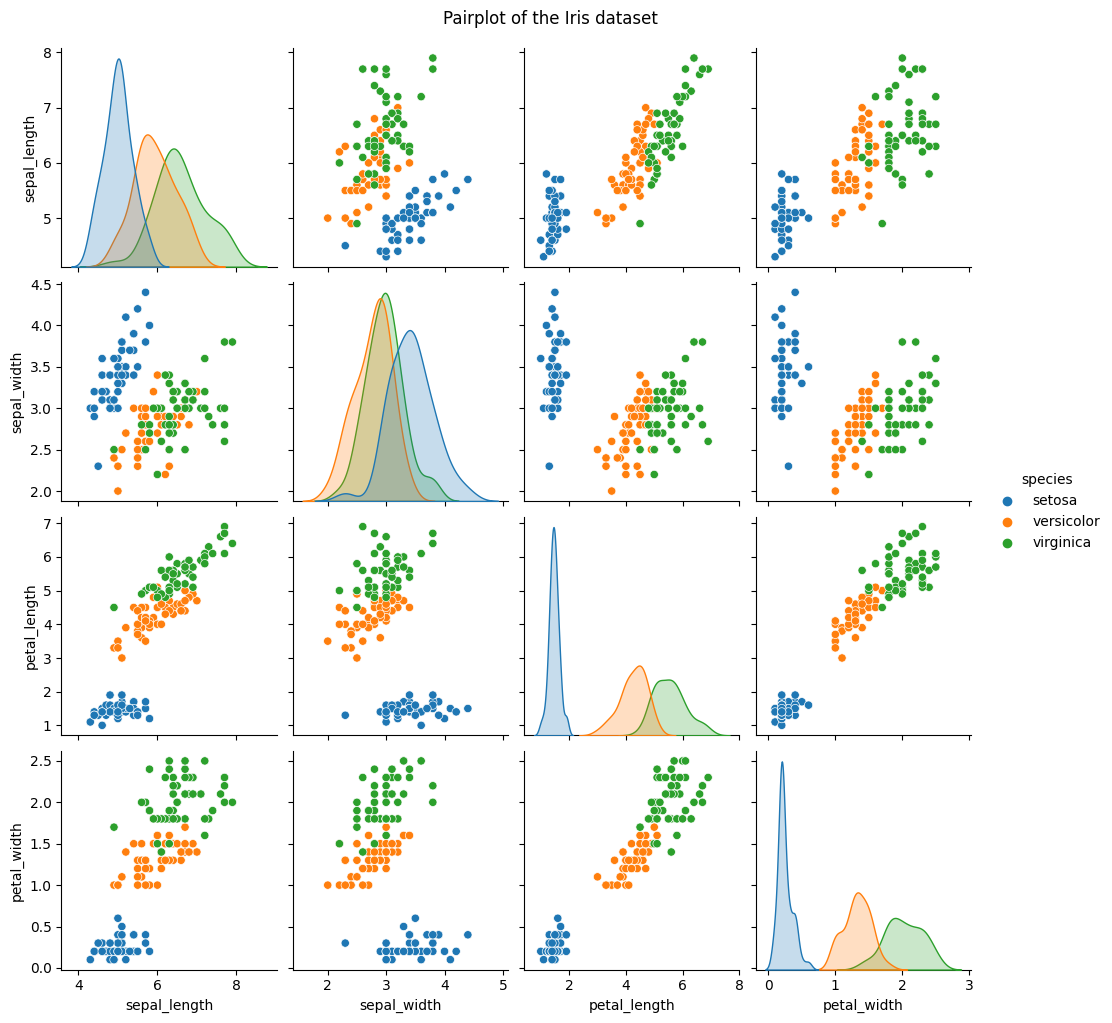

In [1]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Load iris dataset for visualization
iris = sns.load_dataset('iris')

# Pairplot to visualize relationships between features
sns.pairplot(iris, hue='species')
plt.suptitle("Pairplot of the Iris dataset", y=1.02)

plt.show()


the following visualization shows that the setosa species have the most distict clusters and it has a smaller petal lengths and widths than the other species. the virgincia species appears to have the largest in petals and lengths. the notiable overlap is between some of the features in versicolor and virginica. 

In [2]:
#importing libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model
from sklearn.metrics import classification_report

In [3]:

# Load iris dataset
iris_data = load_iris()

X = iris_data.data
y = iris_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:


#buliding the model using keras subclassing 
class IRISModel(tf.keras.Model):
    def __init__(self):
        super(IRISModel, self).__init__()
        self.dense1 = layers.Dense(1000, activation='relu')
        self.dense2 = layers.Dense(500, activation='relu')
        self.dense3 = layers.Dense(300, activation='relu')
        self.dropout = layers.Dropout(0.2)
        self.dense4 = layers.Dense(3, activation='softmax')

    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        # Use the dropout layer only if training=True
        if training:
            x = self.dropout(x, training=training)
        return self.dense4(x)
    
    # function to print the summary of the model with output shape
    def summary(self):
        x = Input(shape=(None, 4))
        model =Model(inputs=[x], outputs=self.call(x))
        return model.summary()

using adam optimizer 

In [5]:
#create the model
model_adam = IRISModel()

#compile the model
model_adam.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])



Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



using SGD optimizer

In [6]:
model_SGD = IRISModel()

#compile the model
model_SGD.compile(optimizer='SGD', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [7]:
#model using adam summary
model_adam.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 4)]         0         
                                                                 
 dense (Dense)               (None, None, 1000)        5000      
                                                                 
 dense_1 (Dense)             (None, None, 500)         500500    
                                                                 
 dense_2 (Dense)             (None, None, 300)         150300    
                                                                 
 dense_3 (Dense)             (None, None, 3)           903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [8]:
#model using SGD summary
model_SGD.summary() 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 4)]         0         
                                                                 
 dense_4 (Dense)             (None, None, 1000)        5000      
                                                                 
 dense_5 (Dense)             (None, None, 500)         500500    
                                                                 
 dense_6 (Dense)             (None, None, 300)         150300    
                                                                 
 dense_7 (Dense)             (None, None, 3)           903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


training using the model with adam optimizer

In [9]:
#train the model
adam_history = model_adam.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50


2023-10-28 21:53:06.206650: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 1s 43ms/step - loss: 0.9116 - accuracy: 0.6417
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 0.5170 - accuracy: 0.8083
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 0.3598 - accuracy: 0.8167
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.3287 - accuracy: 0.8500
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 0.3082 - accuracy: 0.7917
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.2468 - accuracy: 0.8667
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.2269 - accuracy: 0.9083
Epoch 8/50
4/4 [==============================] - 0s 11ms/step - loss: 0.2098 - accuracy: 0.8917
Epoch 9/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1670 - accuracy: 0.9417
Epoch 10/50
4/4 [==============================] - 0s 19ms/step - loss: 0.1488 - accuracy: 0.9333
Epoch 11/50
4/4 [=========================

training using model with SGD optimizer

In [10]:
#train the model
SGD_history = model_SGD.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
4/4 [==============================] - 0s 24ms/step - loss: 1.0827 - accuracy: 0.4917
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 1.0561 - accuracy: 0.6417
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 1.0340 - accuracy: 0.6583
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 1.0054 - accuracy: 0.7250
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9853 - accuracy: 0.7167
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9702 - accuracy: 0.7333
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9444 - accuracy: 0.7583
Epoch 8/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9231 - accuracy: 0.7583
Epoch 9/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9013 - accuracy: 0.7917
Epoch 10/50
4/4 [==============================] - 0s 11ms/step - loss: 0.8871 - accuracy: 0.7917
Epoch 11/50
4/4 [================

compare accuracy of both models

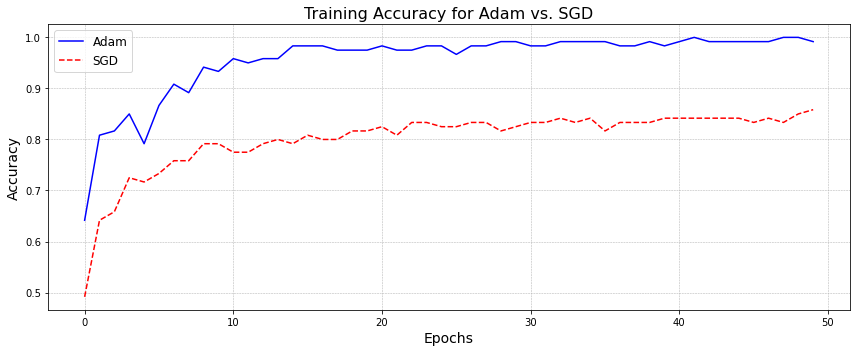

In [11]:
import matplotlib.pyplot as plt

# Plot the training accuracy of Adam and SGD
plt.figure(figsize=(12,5))  # Set the figure size
plt.plot(adam_history.history['accuracy'], label='Adam', color='blue', linestyle='-')
plt.plot(SGD_history.history['accuracy'], label='SGD', color='red', linestyle='--')

# Add title and labels
plt.title('Training Accuracy for Adam vs. SGD', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)


plt.legend(loc='best', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


In [12]:
#evaluate the adam model on test data
loss, accuracy = model_adam.evaluate(X_test, y_test)

1/1 [==============================] - 0s 184ms/step - loss: 0.0025 - accuracy: 1.0000


In [13]:
#print metrics
print("Adam Model Loss: ", loss)
print("Adam Model Accuracy: ", accuracy)

#calculate precision, recall and f1-score
y_pred = model_adam.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

Adam Model Loss:  0.002487866673618555
Adam Model Accuracy:  1.0
1/1 [==============================] - 0s 74ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
#evalauate the SGD model on test data
loss, accuracy = model_SGD.evaluate(X_test, y_test)

1/1 [==============================] - 0s 182ms/step - loss: 0.3760 - accuracy: 0.9000


In [15]:
#print metrics
print("SGD Model Loss: ", loss)
print("SGD Model Accuracy: ", accuracy)

#calculate precision, recall and f1-score
y_pred = model_SGD.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

SGD Model Loss:  0.3760131001472473
SGD Model Accuracy:  0.9000000357627869
1/1 [==============================] - 0s 53ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



1/1 [==============================] - 0s 18ms/step


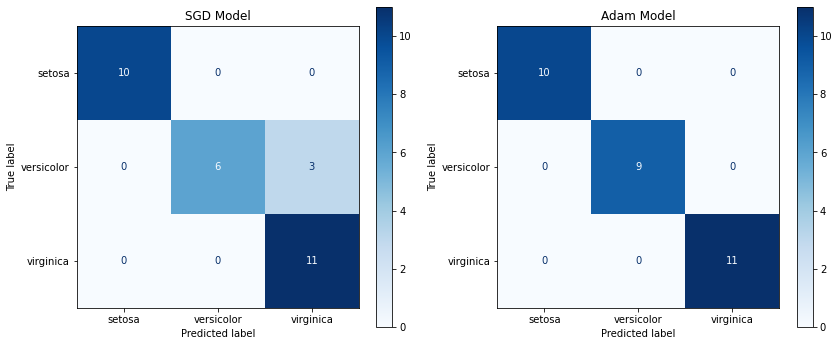

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot confusion matrix for SGD model
y_pred = model_SGD.predict(X_test)
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_data.target_names)
disp.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('SGD Model')

# Plot confusion matrix for adam model
y_pred = model_adam.predict(X_test)
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_data.target_names)
disp.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Adam Model')

# Display the figure
plt.tight_layout()
plt.show()

